# Evaluate the Harmony question matcher using the existing McElroy et al harmonisation tool as a gold standard

This is a validation of Harmony against the questionnaire harmonisation tool developed by McElroy et al in 2020.

You can read in detail about the validation report here:

https://harmonydata.org/measuring-the-performance-of-nlp-algorithms/

You can read an explanation of the technologies evaluated here:

https://harmonydata.org/how-does-harmony-work/

In [1]:
MODEL_NAME = "Model 4: Spacy Large Monolingual Word Vectors"

import sys
sys.path.append("../front_end")
from utils.question_matcher_spacy_lg import QuestionMatcherSpacyLgEnglishOnly
qm = QuestionMatcherSpacyLgEnglishOnly()
match_function = lambda question_dfs : qm.match_questions(question_dfs)

/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/harmony/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
from load_validation_data import validation_data
from validation import validate

<Figure size 800x800 with 0 Axes>

Validating on dataset McElroy et al Childhood
	Processing 47 instruments of average length 23 questions each
	Calculated 562315 match scores
	Generated 40708 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES McElroy et al Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,"yes, occasionally",Truants from school,0.22,1
1,Is Disobedient,"frequently cribs""",0.26,1
2,Is Disobedient,sometimes cribs,0.26,1
3,"Inattentive, easily distracted",average concentration,0.31,1
4,Bites nails,Has a stutter or stammer,0.32,1
5,Is Inattentive,average concentration,0.34,1
6,She is always on the go,"Squirmy, fidgety child",0.34,1
7,Sometimes late,Truants from school,0.34,1
8,Fails to finish things he,average concentration,0.35,1
9,"Never "" or ""Never late unless with good reason",Truants from school,0.36,1



FALSE POSITIVES OR WEAKEST REJECTIONS McElroy et al Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Cannot settle to anything for more than a few moments,Child cannot settle to do anything for more than a few moments,0.99,0
1,I laughed a lot,I cried a lot,0.97,0
2,"A quarrelsome and aggressive child"" or ""Takes a normal part in rough games","very anxious"" or ""Takes a normal part in rough games",0.97,0
3,Has Stutter or Stammer,Has a stutter or stammer,0.96,0
4,Gets on With Other Children,Gets on better with adults than with other children,0.96,0
5,"Tends to become unduly miserable or worried""","Tends to become unduly resentful"" or ""Seldom or never difficult to discipline",0.95,0
6,Child cannot settle to do anything for more than a few moments,Has difficulty in settling to anything for more than a few moments,0.95,0
7,Child destroys her own things or those belonging to others,Child takes things belonging to others,0.95,0
8,"usually gloomy and sad"" or ""Normal attitude to criticism and punishment","frequently disobedient"" or ""Normal attitude to criticism and punishment",0.95,0
9,I felt I was no good anymore,I felt so tired I just sat around and did nothing,0.95,0


Validating on dataset McElroy et al Adulthood
	Processing 28 instruments of average length 16 questions each
	Calculated 95600 match scores
	Generated 9468 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES McElroy et al Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,I hated myself,Are you selfconscious in public (rate simple ideas of reference),0.48,1
1,muscles feel tensed up (rate muscular tension),Found everything getting on top of you,0.57,1
2,I felt valued,Are you selfconscious in public (rate simple ideas of reference),0.58,1
3,I hated myself,What is your opinion of yourself compared to other people (rate selfdepreciation),0.59,1
4,I thought nobody really loved me,Are you selfconscious in public (rate simple ideas of reference),0.60,1
5,I did everything wrong,Are you selfconscious in public (rate simple ideas of reference),0.62,1
6,I felt I was no good anymore,Are you selfconscious in public (rate simple ideas of reference),0.63,1
7,I hated myself,been losing confidence in yourself,0.63,1
8,Have you felt calm and peaceful,muscles feel tensed up (rate muscular tension),0.63,1
9,I felt happy,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.64,1



FALSE POSITIVES OR WEAKEST REJECTIONS McElroy et al Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Have you been a happy person,Have you been a very nervous person,0.96,0
1,Have you felt so down in the dumps that nothing could cheer you up,"During the last days, about how often did you feel so depressed nothing could cheer you up",0.96,0
2,"During the last days, about how often did you feel so depressed nothing could cheer you up",Have you had times when you felt shaky or you heart pounded or you felt sweaty and you simply had to do something about it (rate panic attacks),0.96,0
3,Have you felt so down in the dumps that nothing could cheer you up,have you had the feeling that the future does not hold much for you,0.96,0
4,What is it like when you worry A round of painful thought which cannot be stopped and is out of proportion to the subject worried about (rate worrying),have you had the feeling that the future does not hold much for you,0.95,0
5,"During the last days, about how often did you feel so depressed nothing could cheer you up",Found at times you couldn't do anything because your nerves were too bad,0.95,0
6,have there been days when you found it difficult to get things done or had trouble getting started on things,Found at times you couldn't do anything because your nerves were too bad,0.95,0
7,"During the last days, about how often did you feel so depressed nothing could cheer you up",have there been days when you found it difficult to get things done or had trouble getting started on things,0.95,0
8,"During the last days, about how often did you feel so depressed nothing could cheer you up",have there been days when you tired out very easily,0.95,0
9,Have you had times when you felt shaky or you heart pounded or you felt sweaty and you simply had to do something about it (rate panic attacks),Found at times you couldn't do anything because your nerves were too bad,0.95,0


Validating on dataset GAD-7 (EN/PT)
Found Portuguese dataset GAD-7 (EN/PT)
Found Portuguese dataset GAD-7 (EN/PT)
	Processing 2 instruments of average length 7 questions each
	Calculated 49 match scores
	Generated 49 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES GAD-7 (EN/PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Not being able to stop or control worrying,Não ser capaz de impedir ou de controlar as preocupações,0.01,1
1,Worrying too much about different things,Preocupar-se muito com diversas coisas,0.03,1
2,Being so restless that it is hard to sit still,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.04,1
3,Trouble relaxing,Dificuldade para relaxar,0.06,1
4,"Feeling afraid, as if something awful might happen",Sentir medo como se algo horrível fosse acontecer,0.07,1
5,Becoming easily annoyed or irritable,Ficar facilmente aborrecido/a ou irritado/a,0.28,1
6,"Feeling nervous, anxious, or on edge","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.30,1



FALSE POSITIVES OR WEAKEST REJECTIONS GAD-7 (EN/PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Being so restless that it is hard to sit still,Ficar facilmente aborrecido/a ou irritado/a,0.35,0
1,"Feeling afraid, as if something awful might happen",Ficar facilmente aborrecido/a ou irritado/a,0.35,0
2,Not being able to stop or control worrying,Ficar facilmente aborrecido/a ou irritado/a,0.35,0
3,"Feeling nervous, anxious, or on edge",Ficar facilmente aborrecido/a ou irritado/a,0.32,0
4,"Feeling afraid, as if something awful might happen","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.28,0
5,Worrying too much about different things,Ficar facilmente aborrecido/a ou irritado/a,0.26,0
6,Being so restless that it is hard to sit still,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.24,0
7,Trouble relaxing,Ficar facilmente aborrecido/a ou irritado/a,0.24,0
8,Not being able to stop or control worrying,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.23,0
9,Becoming easily annoyed or irritable,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.21,0


Validating on dataset BHRCS SDQ/CBCL (PT)
Found Portuguese dataset BHRCS SDQ/CBCL (PT)
Found Portuguese dataset BHRCS SDQ/CBCL (PT)
	Processing 2 instruments of average length 73 questions each
	Calculated 3025 match scores
	Generated 3025 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES BHRCS SDQ/CBCL (PT)



/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/projects_client/wellcome/harmony/notebooks/../front_end/utils/question_matcher_spacy_lg.py:29: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  pairwise_similarity = transforms[i].iloc[ii].similarity(transforms[j].iloc[jj])


,Instrument 1,Instrument 2,Score from model,Ground truth
0,É nervoso(a) ou tenso(a),"Tem muitas preocupações, muitas vezes parece preocupado com tudo",0.38,1
1,Fica emburrado(a) facilmente,Frequentemente tem acessos de raiva ou crises de birra,0.41,1
2,É desatento(a) ou distrai-se facilmente,Facilmente perde a concentração,0.42,1
3,Grita muito,Frequentemente tem acessos de raiva ou crises de birra,0.54,1
4,"Não consegue se concentrar, não consegue prestar atenção por muito tempo",Facilmente perde a concentração,0.58,1
5,É barulhento(a) demais,Pensa nas coisas antes de fazê-las,0.59,1
6,Chora muito,"Frequentemente parece triste, desanimado ou choroso",0.59,1
7,Fala demais,Pensa nas coisas antes de fazê-las,0.61,1
8,Ataca fisicamente as pessoas,Frequentemente briga com outros jovens ou os amedronta,0.62,1
9,"Isola-se, não se relaciona com os outros","É solitário, prefere brincar sozinho",0.67,1



FALSE POSITIVES OR WEAKEST REJECTIONS BHRCS SDQ/CBCL (PT)



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Destrói coisas de sua família ou de outros,"Rouba coisas de casa, da escola ou de outros lugares",0.95,0
1,Argumenta muito para não fazer o que querem que ele faça,"Não consegue parar sentado quando tem que fazer a lição ou comer; mexe-se muito, etc",0.94,0
2,"Não consegue se concentrar, não consegue prestar atenção por muito tempo","Não consegue parar sentado quando tem que fazer a lição ou comer; mexe-se muito, etc",0.94,0
3,Argumenta muito para não fazer o que querem que ele faça,"Fica inseguro quando tem que fazer alguma coisa pela primeira vez, facilmente perde a confiança em si mesmo",0.93,0
4,"Não consegue se concentrar, não consegue prestar atenção por muito tempo","Fica inseguro quando tem que fazer alguma coisa pela primeira vez, facilmente perde a confiança em si mesmo",0.93,0
5,Argumenta muito para não fazer o que querem que ele faça,Geralmente é obediente e faz normalmente o que os adultos lhe pedem,0.92,0
6,Junta muitas coisas que não precisa e que não servem para nada,"Não consegue parar sentado quando tem que fazer a lição ou comer; mexe-se muito, etc",0.92,0
7,Não se arrepende depois de se comportar mal,"Tenta ser atencioso se alguém parece magoado, aflito ou se sentindo mal",0.92,0
8,Junta muitas coisas que não precisa e que não servem para nada,"Fica inseguro quando tem que fazer alguma coisa pela primeira vez, facilmente perde a confiança em si mesmo",0.91,0
9,Acha que tem que fazer tudo perfeito,"Não consegue parar sentado quando tem que fazer a lição ou comer; mexe-se muito, etc",0.91,0


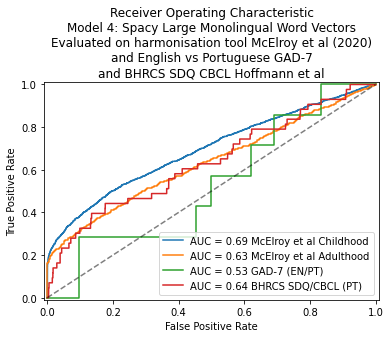

In [3]:
validate(validation_data, match_function, MODEL_NAME)